Implementation of modified parareal algorithm. Here we compare the results with the old parareal algorithm

In [1]:
# Backward Euler Method
using LinearAlgebra
function backeuler(a, b, u0, N)
    u=zeros(N+1)
    dt=(b-a)/N
    t=Vector(range(a, b, N+1))
    A=1 .- t.^2 *dt # A is computed by Backward Euler method from du/dt=t^2 *u
    u[1]=u0
    for i in 1:N
        u[i+1]=u[i]/A[i]
    end
    return t, u
end

backeuler (generic function with 1 method)

# Old Parareal

In [2]:
# Parareal method
function parareal_old(a, b, u0, N, F, G, K)
    # a= start time value (t0)
    # b= End time value (tend)
    # N= Number of Subinterval
    # u0=initial Solution
    # F= Fine Solver
    # G= Coarse Solver
    # K= Parareal iteration
    
    tval=Vector(range(a, b, N+1))
    # Storing Fine Solution on each time step for comparison
    Ufine=zeros(N+1)
    Ufine[1]=u0
    for i in 1:N
        Ufine[i+1]=F(tval[i], tval[i+1], Ufine[i])
    end
    # Initializing Uk
    Uk=[zeros(N+1) for k in 1:K+1]
    #Storing the initial solution
    for k in 1:K+1
        Uk[k][1]=u0
    end
    # Parareal Initialization
    for j in 1:N
        Uk[1][j+1]=G(tval[j], tval[j+1], Uk[1][j])
    end
    # Parareal loop
    for k in 1:K
        for n in 1:N
            Fk0=F(tval[n], tval[n+1], Uk[k][n])
            Gk0=G(tval[n], tval[n+1], Uk[k][n])
            Gk1=G(tval[n], tval[n+1], Uk[k+1][n])
            
            Uk[k+1][n+1]=Fk0 + Gk1-Gk0
        end
    end
    
    return Uk, Ufine, tval
  
end

parareal_old (generic function with 1 method)

# Modified Parareal

In [3]:
# Parareal method
function modified_parareal(a, b, u0, N, F, G, K)
    # a= start time value (t0)
    # b= End time value (tend)
    # N= Number of Subinterval
    # u0=initial Solution
    # F= Fine Solver
    # G= Coarse Solver
    # K= Parareal iteration
    
    tval=Vector(range(a, b, N+1))
    # Storing Fine Solution on each time step for comparison
    Ufine=zeros(N+1)
    Ufine[1]=u0
    for i in 1:N
        Ufine[i+1]=F(tval[i], tval[i+1], Ufine[i])
    end
    # Initializing Uk
    Uk=[zeros(N+1) for k in 1:K+1]
    #Storing the initial solution
    for k in 1:K+1
        Uk[k][1]=u0
    end
    # Parareal Initialization
    for j in 1:N
        Uk[1][j+1]=G(tval[j], tval[j+1], Uk[1][j])
    end
    δUk=[zeros(N+1) for k in 1:K+1]
    # Parareal loop
    for k in 1:K
        for n in 1:N
            δUk[k][n]=Uk[k+1][n]-Uk[k][n]
            Fk0=F(tval[n], tval[n+1], Uk[k][n])
            Gk=G(tval[n], tval[n+1], δUk[k][n])
            Uk[k+1][n+1]=Fk0 + Gk
        end
    end
    
    return Uk, Ufine, tval
  
end

modified_parareal (generic function with 1 method)

# Now we test the algorithms

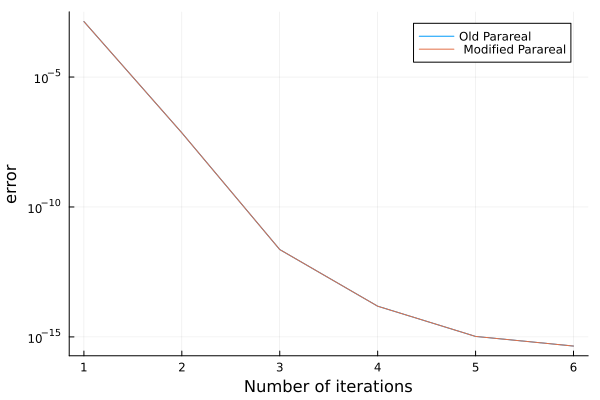

In [13]:
a=0
b=1
u0=1

#exact=exp.((t.^3)/3)


nF=500 # Fine grid
nG=10 # Coarse grid
K=5 # Number of iteration

function finesol(a, b, u0)
    t, u=backeuler(a, b, u0, nF)
    return u[end]
end
function coarsesol(a, b, u0)
    t, u=backeuler(a, b, u0, nG)
    return u[end]
end

N=300 # Number of Subintervals

# Parareal Solutions
Uk, Ufine, tval=parareal_old(a, b, u0, N, finesol, coarsesol, K)
Uk, Ufine, tval=modified_parareal(a, b, u0, N, finesol, coarsesol, K)
# stroing errors
    err=zeros(K+1)
    err_mod=zeros(K+1)
    for k in 1:K+1
        err[k]=norm(Uk[k]-Ufine)
        err_mod[k]=norm(Uk[k]-Ufine)
    end
using Plots
plot(err, yaxis=:log, xlabel="Number of iterations", ylabel="error", label="Old Parareal")
plot!(err_mod, yaxis=:log,xlabel="Number of iterations", ylabel="error", label=" Modified Parareal")

In [16]:
err_mod, err


([0.0013681709364040053, 7.14993491725534e-8, 2.296777101502393e-12, 1.5175575129726027e-14, 1.041481514324134e-15, 4.440892098500626e-16], [0.0013681709364040053, 7.14993491725534e-8, 2.296777101502393e-12, 1.5175575129726027e-14, 1.041481514324134e-15, 4.440892098500626e-16])